In [1]:
import numpy as np
import tensorflow as tf
import hashlib as hl
import time
from IPython.display import Image

In [2]:
# Plan
# 1 metagraph ( predicates )
# 2 flattening
# 3 embedding
# 4 results

In [3]:
# define datamodel 
class VertexGeneric:
    id_key = None
    name = None
    attributes = list # [(),()]
    
    def __init__(self):
        bytes_seed = bytes(str(time.time()), 'utf-8')
        self.id_key = hl.md5(bytes_seed).hexdigest()
    
    def add_attr(key, value):
        attributes.append((key, value))
    
class MetaVertex(VertexGeneric):
    fragment = set() # inner objects of metagraph
    all_elems = []
    
    def __init__(self, name, fragment): # 2nd is a fragment
        super(MetaVertex, self).__init__()
        self.name = name
        self.fragment = fragment
        
    def graph_depth(self):
        for i in self.fragment:
            if i not in self.all_elems:
                self.all_elems.append(i)
                i.graph_depth() if isinstance(i, MetaVertex) else _
                            

class Vertex(VertexGeneric):
    def __init__(self, name):
        super(Vertex, self).__init__()
        self.name = name
    
    
class Edge(VertexGeneric):
    source = None
    destination = None
    oriented = False
    
    def __init__(self, name, source, destination, oriented=False): # 2nd is a fragment
        super(Edge, self).__init__()
        self.name = name
        self.source = source
        self.destination = destination
        self.oriented = oriented
        
class FlattenGraph():
    name = None
    fragment = None
    matrix = None # [(obj, [])]
    index_list = []
    
    def __init__(self, fragment):
        self.name = fragment.name
        self.fragment = fragment
        fragment.graph_depth()
        self.index_list = fragment.all_elems
        self.compose_matrix()
    
    def compose_matrix(self):
        i = len(self.index_list)
        matrix = np.eye(i, dtype='int8') # единичная матрица 8 бит на элемент
        for idx, item in enumerate(self.index_list):
            if isinstance(item, MetaVertex):
                for j in item.fragment:
                    matrix[idx][self.index_list.index(j)] = 1
                    matrix[self.index_list.index(j)][idx] = 1
            
            if isinstance(item, Edge):
                matrix[self.index_list.index(item.source)][self.index_list.index(item)] = 1
                matrix[self.index_list.index(item)][self.index_list.index(item.source)] = 1
                matrix[self.index_list.index(item.destination)][self.index_list.index(item)] = 1
                matrix[self.index_list.index(item)][self.index_list.index(item.destination)] = 1
        
        self.matrix = matrix

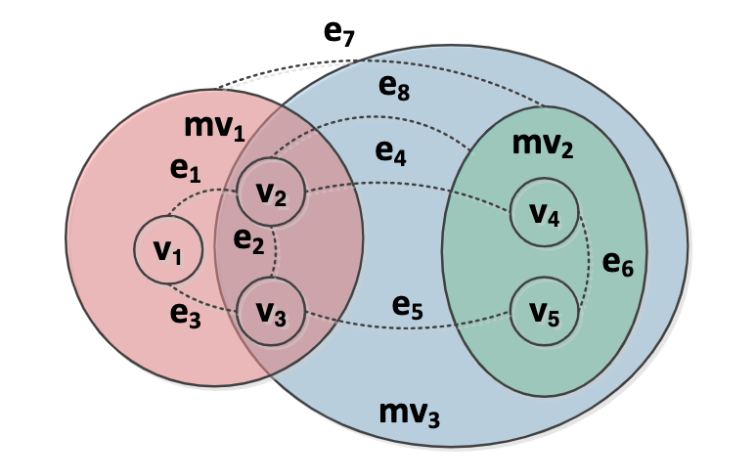

In [4]:
# metagraph sample
Image(filename='img/mt_sample.png', width=400) 

In [5]:
import time
# Realisation

# Verticies
v1 = Vertex(name='v1')
v2 = Vertex(name='v2')
v3 = Vertex(name='v3')
v4 = Vertex(name='v4')
v5 = Vertex(name='v5')

# Edges
e1 = Edge(name='e1', source=v1, destination=v2)
e2 = Edge(name='e2', source=v2, destination=v3)
e3 = Edge(name='e3', source=v1, destination=v3)
e4 = Edge(name='e4', source=v2, destination=v4)
e5 = Edge(name='e5', source=v3, destination=v5)
e6 = Edge(name='e6', source=v4, destination=v5)

# MetaVerticies
mv1 = MetaVertex(name='mv1', fragment={
    v1,
    v2,
    v3,
    e1,
    e2,
    e3
})

mv2 = MetaVertex(name='mv2', fragment={
    v4,
    v5,
    e6
})

e7 = Edge(name='e7', source=mv1, destination=mv2)
e8 = Edge(name='e8', source=v2, destination=mv2)

mv3 = MetaVertex(name='mv3', fragment={
    v2,
    v3,
    e2,
    e4,
    e5,
    e8,
    mv2
})

metagraph = MetaVertex(name='metagraph', fragment={
    mv1,
    mv3,
    e7
})

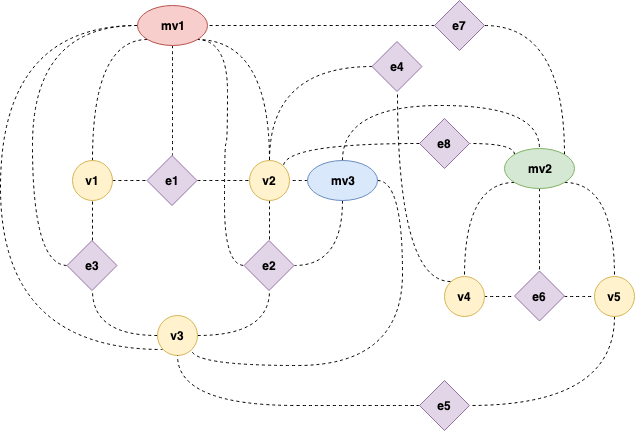

In [6]:
# Flatten Graph
Image(filename='img/flat_mt_sample.png', width=400) 

In [6]:
# BIG INSTANCE

# Verticies
v1 = Vertex(name='v1')
v2 = Vertex(name='v2')
v3 = Vertex(name='v3')
v4 = Vertex(name='v4')
v5 = Vertex(name='v5')
v6 = Vertex(name='v6')
v7 = Vertex(name='v7')
v8 = Vertex(name='v8')
v9 = Vertex(name='v9')
v10 = Vertex(name='v10')
v11 = Vertex(name='v11')
v12 = Vertex(name='v12')
v13 = Vertex(name='v13')
v14 = Vertex(name='v14')
v15 = Vertex(name='v15')
v16 = Vertex(name='v16')
v17 = Vertex(name='v17')
v18 = Vertex(name='v18')
v19 = Vertex(name='v19')
v20 = Vertex(name='v20')
v21 = Vertex(name='v21')
v22 = Vertex(name='v22')
v23 = Vertex(name='v23')
v24 = Vertex(name='v24')
v25 = Vertex(name='v25')
v26 = Vertex(name='v26')
v27 = Vertex(name='v27')
v28 = Vertex(name='v28')
v29 = Vertex(name='v29')
v30 = Vertex(name='v30')
v31 = Vertex(name='v31')
v32 = Vertex(name='v32')
v33 = Vertex(name='v33')
v34 = Vertex(name='v34')
v35 = Vertex(name='v35')
v36 = Vertex(name='v36')
v37 = Vertex(name='v37')
v38 = Vertex(name='v38')
v39 = Vertex(name='v39')
v40 = Vertex(name='v40')
v41 = Vertex(name='v41')


# Edges
e1 = Edge(name='e1', source=v1, destination=v9)
e2 = Edge(name='e2', source=v1, destination=v2)
e3 = Edge(name='e3', source=v2, destination=v3)
e4 = Edge(name='e4', source=v9, destination=v3)
e5 = Edge(name='e5', source=v2, destination=v4)
e6 = Edge(name='e6', source=v2, destination=v6)
e7 = Edge(name='e7', source=v4, destination=v5)
e8 = Edge(name='e8', source=v5, destination=v10)
e9 = Edge(name='e9', source=v4, destination=v10)
e10 = Edge(name='e10', source=v6, destination=v7)
e11 = Edge(name='e11', source=v7, destination=v29)
e13 = Edge(name='e13', source=v31, destination=v32) 
e15 = Edge(name='e15', source=v11, destination=v12)
e16 = Edge(name='e16', source=v32, destination=v26)
e19 = Edge(name='e19', source=v26, destination=v28)
e20 = Edge(name='e20', source=v28, destination=v27)
e21 = Edge(name='e21', source=v27, destination=v18)
e23 = Edge(name='e23', source=v8, destination=v20)
e24 = Edge(name='e24', source=v25, destination=v27)
e25 = Edge(name='e25', source=v23, destination=v25)
e26 = Edge(name='e26', source=v22, destination=v25)
e27 = Edge(name='e27', source=v22, destination=v23)
e29 = Edge(name='e29', source=v8, destination=v21)
e30 = Edge(name='e30', source=v19, destination=v21)
e31 = Edge(name='e31', source=v18, destination=v24)
e32 = Edge(name='e32', source=v8, destination=v20)
e34 = Edge(name='e34', source=v8, destination=v10)
e42 = Edge(name='e42', source=v13, destination=v14)
e43 = Edge(name='e43', source=v12, destination=v15)
e44 = Edge(name='e44', source=v9, destination=v17)
e47 = Edge(name='e47', source=v34, destination=v37)
e48 = Edge(name='e48', source=v35, destination=v37)
e50 = Edge(name='e50', source=v15, destination=v37)
e51 = Edge(name='e51', source=v35, destination=v36)
e52 = Edge(name='e52', source=v36, destination=v37)
e53 = Edge(name='e53', source=v38, destination=v40)
e54 = Edge(name='e54', source=v37, destination=v39)
e55 = Edge(name='e55', source=v36, destination=v41)
e56 = Edge(name='e56', source=v39, destination=v41)
e57 = Edge(name='e57', source=v39, destination=v40)
e58 = Edge(name='e58', source=v38, destination=v37)
e59 = Edge(name='e59', source=v34, destination=v38)
e63 = Edge(name='e63', source=v7, destination=v10)

# Metaverticies
mv1 = MetaVertex(name='mv1', fragment={
    v1, v2, v3, v9,
    e1, e2, e3, e4
})
mv3 = MetaVertex(name='mv3', fragment={
    v4, v5, v10,
    e7, e8, e9, e4
})
mv14 = MetaVertex(name='mv14', fragment={
    v9
})
mv13 = MetaVertex(name='mv13', fragment={
    mv14
})
mv15 = MetaVertex(name='mv15', fragment={
    v19, v21, v20,
    e30
})

e35 = Edge(name='e35', source=v16, destination=mv13)
mv12 = MetaVertex(name='mv12', fragment={
    v16,
    e35,
    mv13
})


mv5 = MetaVertex(name='mv5', fragment={
    v13, v14, v15,
    e42
})

e40 = Edge(name='e40', source=mv5, destination=v12)

mv4 = MetaVertex(name='mv4', fragment={
    v11, v12, v13,
    e15, e40
})

mv6 = MetaVertex(name='mv6', fragment={
    v15, v16, v17
})

mv7 = MetaVertex(name='mv7', fragment={
    v9, v11, v12,
    e15
})

mv11 = MetaVertex(name='mv11', fragment={
    v7, v8, v10,
    e34, e63
})


mv17 = MetaVertex(name='mv17', fragment={
    v22, v23, v25,
    e27, e25, e26
})

mv18 = MetaVertex(name='mv18', fragment={
    v24, v18, v20,
    e31
})

mv9 = MetaVertex(name='mv9', fragment={
    v30, v7, v29,
    e11
})

mv19 = MetaVertex(name='mv19', fragment={
    v32, v30, v26,
    e16
})

mv20 = MetaVertex(name='mv20', fragment={
    v31, v32,
    e13
})

mv21 = MetaVertex(name='mv21', fragment={
    v34, v35, v38, v37, v36, v40, v39, v41,
    e59, e47, e48, e51, e55, e54, e53, e52, e58, e57, e56
})

mv22 = MetaVertex(name='mv22', fragment={
    v33,
})

mv2 = MetaVertex(name='mv2', fragment={
    v2, v3, v6, v7,
    e3, e6, e10, e5, e13, e63,
    mv3
})

e36 = Edge(name='e36', source=v5, destination=mv14)
mv8 = MetaVertex(name='mv8', fragment={
    v5, v10, v8, v21,
    e36, e8, e34, e29, 
    mv12
})

mv10 = MetaVertex(name='mv10', fragment={
    v8, v16, v18, v23, v22,
    e29, e32, e27,
    mv15, 
})

mv16 = MetaVertex(name='mv16', fragment={
    v26, v19, v28, v27,
    e20, e19, e21, e24, 
    mv18, mv17 
})
#

e12 = Edge(name='e12', source=v29, destination=mv20)  
e14 = Edge(name='e14', source=mv2, destination=mv4)
e17 = Edge(name='e17', source=v32, destination=mv9)
e18 = Edge(name='e18', source=mv19, destination=mv18)
e22 = Edge(name='e22', source=mv18, destination=mv20)
e28 = Edge(name='e28', source=v8, destination=mv18)
e33 = Edge(name='e33', source=mv15, destination=mv20)


e37 = Edge(name='e37', source=mv7, destination=mv15)
e38 = Edge(name='e38', source=mv15, destination=v17)
e39 = Edge(name='e39', source=v17, destination=mv4)
e41 = Edge(name='e41', source=mv13, destination=v11)
e45 = Edge(name='e45', source=v34, destination=mv6)
e46 = Edge(name='e46', source=v34, destination=mv10)
e49 = Edge(name='e49', source=v35, destination=mv6)
e60 = Edge(name='e60', source=mv22, destination=mv21)
e61 = Edge(name='e61', source=mv22, destination=v19)
e62 = Edge(name='e62', source=v41, destination=mv22)

metagraph = MetaVertex(name='metagraph', fragment={
    mv1,
    mv2,
    mv8,
    mv4,
    mv5,
    mv6,
    mv7,
    mv9,
    mv10,
    mv11,
    mv16,
    mv19,
    mv20,
    mv21,
    mv22,
    
    e12,
    e13,
    e14,
    e17,
    e18,
    e19,
    e22,
    e23,
    e28,
    e33,
    e38,
    e34,
    e37,
    e39,
    e40,
    e41,
    e43,
    e44,
    e45,
    e46,
    e49,
    e50,
    e60,
    e61,
    e62
})

In [7]:
def show_metagraph(ft):
    # All elements and indicies
    for i in range(len(ft.matrix)):
        print(i, '\t', ft.index_list[i].name, '\t', ft.index_list[i].id_key, '\t',
              type(ft.index_list[i]).__name__)
    
def show_element(name, ft):
    for idx, i in enumerate(flatten_graph.matrix):
        if flatten_graph.index_list[idx].name == name:
            for idxx, j in enumerate(i):
                print(name, '--------', flatten_graph.index_list[idxx].name) if j == 1 else _
    
    
    
# Depth-search
flatten_graph = FlattenGraph(fragment=metagraph)
# Show
show_metagraph(ft=flatten_graph)
# show_element(name='v1', ft=flatten_graph)
elems = flatten_graph.index_list
# matrix
matrix = flatten_graph.matrix
print(matrix)
len(elems)

0 	 mv3 	 9e6e7ed7b57ae7c0ca8420d682cf5f0f 	 MetaVertex
1 	 e8 	 95d68991638e2c0fe56145d300390812 	 Edge
2 	 e2 	 520eb846d993c9a77a9ae5e1efd9f411 	 Edge
3 	 mv2 	 8a04f490e88073cf7ca6e1d3fbd39b75 	 MetaVertex
4 	 v5 	 aed457ff1fa1a703fe8d2276d0d8624d 	 Vertex
5 	 v4 	 98c0dd53a1fffadd702d645a8651515b 	 Vertex
6 	 e6 	 329b36c7133045be8e9f74b0aafe2142 	 Edge
7 	 v2 	 3cb86afdaef2129347a268267e8744db 	 Vertex
8 	 e4 	 b3ee7658816d709c1ea6c551585eeba9 	 Edge
9 	 e5 	 217462b9781c6245c327fd2d72b1f2fc 	 Edge
10 	 v3 	 0f4fb2bf2f2435e5debf7b238d390f09 	 Vertex
11 	 e7 	 f71e7521b45a08adea091a4337902aab 	 Edge
12 	 mv1 	 d0854e45e9903c7b65fa2ec235348b78 	 MetaVertex
13 	 e1 	 38d0f80dfa3229d322a800b08a0cf3d4 	 Edge
14 	 e3 	 4be052493d6374fb804f3ed07d8733fb 	 Edge
15 	 v1 	 67871674c0f2c89cd0c5fe56a5a4f88d 	 Vertex
[[1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0]
 [1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0]
 [1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 

16

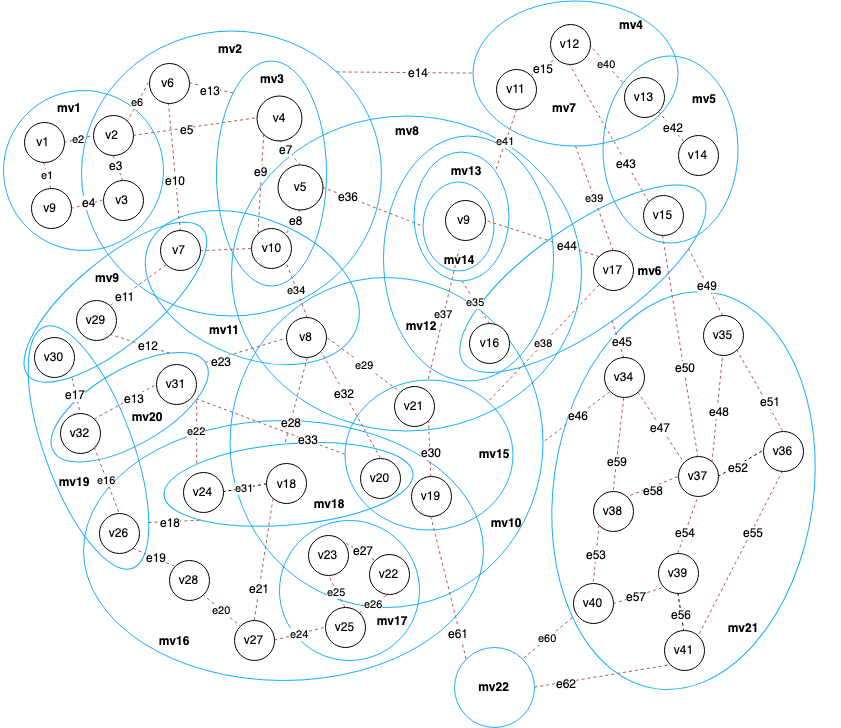

In [7]:
# MtG
Image(filename='img/big_sample.png', width=600)

In [566]:
# !pip install matplotlib==2.2.3
# !pip install plotly 
# !pip install node2vec
# !pip install --upgrade pip
# GEM LIBRARY FOR EmBEDDING
# !pip install git+git://github.com/palash1992/GEM

In [372]:
# File
def write_simple():
    seen = []
    with open("data_gem/mt.edgelist","w+") as f:
        for i_i, i in enumerate(matrix):
            for i_j, j in enumerate(i):
    #             if isinstance(elems[i_i], MetaVertex):
    #                 f.write(str(i_i)+' '+str(i_j)+' '+str(10)+'\n') if j == 1 else _
    #             if isinstance(elems[i_i], Vertex):
    #                 f.write(str(i_i)+' '+str(i_j)+' '+str(1)+'\n') if j == 1 else _
    #             if isinstance(elems[i_i], Edge):
    #                 f.write(str(i_i)+' '+str(i_j)+' '+str(1)+'\n') if j == 1 else _

                if j == 1 and i_i != i_j and (i_i, i_j) not in seen and (i_j, i_i) not in seen:                      
                    if isinstance(elems[i_i], MetaVertex) or isinstance(elems[i_j], MetaVertex):
                        f.write(str(i_i)+' '+str(i_j)+' '+str(1)+'\n')
                    else:
                        f.write(str(i_i)+' '+str(i_j)+' '+str(1)+'\n')

#                 f.write(str(i_i)+' '+str(i_j)+'\n')

                seen.append((i_i, i_j))
    
def write_hirirecal():
    seen = []
    with open("data_gem/mt_small.edgelist","w+") as f:
        for e in elems:
            if isinstance(e, MetaVertex):
                for o in e.fragment:
                    f.write(str(get_index_from_object(e))+' '+str(get_index_from_object(o))+' '+str(0.1)+'\n')
                    
                    for i_i, i in enumerate(matrix):
                        if i_i == get_index_from_object(o):
                            for i_j, j in enumerate(i):
                                if j == 1 and elems[i_j] in e.fragment and i_i != i_j and (i_i, i_j) not in seen and (i_j, i_i) not in seen:
                                    f.write(str(i_i)+' '+str(i_j)+' '+str(0.5)+'\n')
                                    seen.append((i_i, i_j))

                    
        f.write(str(get_index_from_object_name('mv2'))+' '+str(get_index_from_object_name('e7'))+' '+str(0.01)+'\n')
        f.write(str(get_index_from_object_name('e7'))+' '+str(get_index_from_object_name('mv1'))+' '+str(0.01)+'\n')  
        f.write(str(get_index_from_object_name('e4'))+' '+str(get_index_from_object_name('v4'))+' '+str(0.01)+'\n')
        f.write(str(get_index_from_object_name('e5'))+' '+str(get_index_from_object_name('v5'))+' '+str(0.01)+'\n')  
        
write_simple()
# write_hirirecal()

In [8]:
def get_mv_indicies(el):
    a = []
    for i, elem in enumerate(el):
        ind = get_index_from_object(elem)
        a.append(ind) if isinstance(elem, MetaVertex) else _
        
    return np.array(a)

def get_index_from_object(obj):
    for i in range(len(elems)):
        if elems[i].id_key == obj.id_key:
            return i
        

def get_index_from_object_range(objs):
    a = []
    for o in objs:
        ind = get_index_from_object(o)
        a.append(ind)
    return np.array(a)
    
def get_index_from_object_name(name):
    for i in range(len(elems)):
        if elems[i].name == name:
            return i
    
def get_v_indicies(el):
    a = []
    for i, elem in enumerate(el):
        ind = get_index_from_object(elem)
        a.append(ind) if isinstance(elem, Vertex) else _
        
    return np.array(a)
    
def get_e_indicies(el):
    a = []
    for i, elem in enumerate(el):
        ind = get_index_from_object(elem)
        a.append(ind) if isinstance(elem, Edge) else _
        
    return np.array(a)

def get_annot_from_ind(ind):
    text = []
    for i in range(len(elems)):
        text.append(elems[i].name+'_'+str(i)) if i in ind else _
    return text

def get_clusters(emb, labels, n_clusters):
    
    clusters = []
    for i in range(n_clusters):
        a = []
        clusters.append(a)
        
    for i in range(len(emb)):
        cluster_number = labels[i]
        lab = labels[i]
        c = clusters[lab]
        c.append(emb[i])
        clusters[labels[i]] = c

    return clusters
        

In [20]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='zz600571', api_key='eVkgWWtJ4AvqmPmcPsx6')
def show_2d_scatter(emb, name):
    mv_i = get_mv_indicies(elems)
    v_i = get_v_indicies(elems)
    e_i = get_e_indicies(elems)
    
    trace_mv = go.Scatter(
        x = emb[:, 0].take(mv_i),
        y = emb[:, 1].take(mv_i),
        mode = 'markers',
        text = get_annot_from_ind(mv_i),
        marker=dict(
            color='rgb(0, 0, 255)',
            size=12,
            symbol='circle',
            line=dict(
                color='rgba(0, 0, 255, 0.15)',
                width=0.5
            ),
            opacity=0.8
        )
    )
    trace_v = go.Scatter(
        x = emb[:, 0].take(v_i),
        y = emb[:, 1].take(v_i),
        mode = 'markers',
        text = get_annot_from_ind(v_i),
        marker=dict(
            color='rgb(0, 255, 0)',
            size=12,
            symbol='square',
            line=dict(
                color='rgba(0, 255, 0, 0.15)',
                width=0.5
            ),
            opacity=0.8
        )
    )
    trace_e = go.Scatter(
        x = emb[:, 0].take(e_i),
        y = emb[:, 1].take(e_i),
        mode = 'markers',
        text = get_annot_from_ind(e_i),
        marker=dict(
            color='rgb(255, 0, 0)',
            size=12,
            symbol='diamond',
            line=dict(
                color='rgb(255, 0, 0, 0.15)',
                width=1
            ),
            opacity=0.8
        )
    )
    data = [trace_mv, trace_v, trace_e]
    layout = go.Layout(
        title=go.layout.Title(
            text=name,
            xref='paper',
            x=0
        )
    )
    fig = go.Figure(data, layout=layout)
    py.plot(fig, filename='2d_scatter_'+name)
    
def show_3d_scatter(emb, name):
    
    mv_i = get_mv_indicies(elems)
    v_i = get_v_indicies(elems)
    e_i = get_e_indicies(elems)
    
    trace_mv = go.Scatter3d(
        x=emb[:, 0].take(mv_i),
        y=emb[:, 1].take(mv_i),
        z=emb[:, 2].take(mv_i),
        mode='markers',
        text = get_annot_from_ind(mv_i),
        textposition='bottom center',
        marker=dict(
            color='rgb(0, 0, 255)',
            size=12,
            symbol='circle',
            line=dict(
                color='rgba(0, 0, 255, 0.15)',
                width=0.5
            ),
            opacity=0.8
        )
    )

    

    trace_v = go.Scatter3d(
        x=emb[:, 0].take(v_i),
        y=emb[:, 1].take(v_i),
        z=emb[:, 2].take(v_i),
        mode='markers',
        text = get_annot_from_ind(v_i),
        textposition='bottom center',
        marker=dict(
            color='rgb(0, 255, 0)',
            size=8,
            symbol='square',
            line=dict(
                color='rgb(0, 255, 0, 0.15)',
                width=1
            ),
            opacity=0.8
        )
    )
    
    trace_e = go.Scatter3d(
        x=emb[:, 0].take(e_i),
        y=emb[:, 1].take(e_i),
        z=emb[:, 2].take(e_i),
        mode='markers',
        text = get_annot_from_ind(e_i),
        textposition='bottom center',
        marker=dict(
            color='rgb(255, 0, 0)',
            size=8,
            symbol='diamond',
            line=dict(
                color='rgb(255, 0, 0, 0.15)',
                width=1
            ),
            opacity=0.8
        )
    )
    
    data = [trace_mv, trace_v, trace_e]
    layout = go.Layout(
        title=go.layout.Title(
            text=name,
            xref='paper',
            x=0.05,
            y=0.05
        ),
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.plot(fig, filename='3d-scatter_'+name)
    
    
import random
def show_2d_scatter_clusters(emb, cluster_elems, name):
    
    data = []
    for i in range(len(cluster_elems)):
        cluster_elem = cluster_elems[i]
        
        cl_color_r = random.randint(0, 255)
        cl_color_g = random.randint(0, 255)
        cl_color_b = random.randint(0, 255)
        
        mv_i = get_mv_indicies(cluster_elem)
        v_i = get_v_indicies(cluster_elem)
        e_i = get_e_indicies(cluster_elem)
    

        if len(mv_i) != 0:
            mv_annot = [s + "_*" + str(i) for s in get_annot_from_ind(mv_i)]
            trace_mv = go.Scatter(
                x=emb[:, 0].take(mv_i),
                y=emb[:, 1].take(mv_i),
                mode='markers',
                text = mv_annot,
                textposition='bottom center',
                marker=dict(
                    color='rgb(%d, %d, %d)' % (cl_color_r, cl_color_g, cl_color_b),
                    size=12,
                    symbol='circle',
                    line=dict(
                        color='rgb(%d, %d, %d)' % (cl_color_r, cl_color_g, cl_color_b),
                        width=0.5
                    ),
                    opacity=0.8
                )
            )
            data.append(trace_mv)

        
        if len(v_i) != 0:
            v_annot = [s + "_*" + str(i) for s in get_annot_from_ind(v_i)]
            trace_v = go.Scatter(
                x=emb[:, 0].take(v_i),
                y=emb[:, 1].take(v_i),
                mode='markers',
                text = v_annot,
                textposition='bottom center',
                marker=dict(
                    color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                    size=8,
                    symbol='square',
                    line=dict(
                        color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                        width=1
                    ),
                    opacity=0.8
                )
            )
            data.append(trace_v)

        if len(e_i) != 0:   
            e_annot = [s + "_*" + str(i) for s in get_annot_from_ind(e_i)]
            trace_e = go.Scatter(
                x=emb[:, 0].take(e_i),
                y=emb[:, 1].take(e_i),
                mode='markers',
                text = e_annot,
                textposition='bottom center',
                marker=dict(
                    color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                    size=8,
                    symbol='diamond',
                    line=dict(
                        color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                        width=1
                    ),
                    opacity=0.8
                )
            )
            data.append(trace_e)
        
    layout = go.Layout(
        title=go.layout.Title(
            text=name,
            xref='paper',
            x=0.05,
            y=0.05
        ),
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.plot(fig, filename='2d-scatter_'+name)
    

def show_3d_scatter_clusters(emb, cluster_elems, name):
    
    data = []
    for i in range(len(cluster_elems)):
        cluster_elem = cluster_elems[i]
        
        cl_color_r = random.randint(0, 255)
        cl_color_g = random.randint(0, 255)
        cl_color_b = random.randint(0, 255)
        
        mv_i = get_mv_indicies(cluster_elem)
        v_i = get_v_indicies(cluster_elem)
        e_i = get_e_indicies(cluster_elem)
    
        
        
        if len(mv_i) != 0:
            mv_annot = [s + "_*" + str(i) for s in get_annot_from_ind(mv_i)]
            trace_mv = go.Scatter3d(
                x=emb[:, 0].take(mv_i),
                y=emb[:, 1].take(mv_i),
                z=emb[:, 2].take(mv_i),
                mode='markers',
                text = mv_annot,
                textposition='bottom center',
                marker=dict(
                    color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                    size=12,
                    symbol='circle',
                    line=dict(
                        color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                        width=0.5
                    ),
                    opacity=0.8
                )
            )
            data.append(trace_mv)

        
        if len(v_i) != 0:
            v_annot = [s + "_*" + str(i) for s in get_annot_from_ind(v_i)] 
            trace_v = go.Scatter3d(
                x=emb[:, 0].take(v_i),
                y=emb[:, 1].take(v_i),
                z=emb[:, 2].take(v_i),
                mode='markers',
                text = v_annot,
                textposition='bottom center',
                marker=dict(
                    color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                    size=8,
                    symbol='square',
                    line=dict(
                        color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                        width=1
                    ),
                    opacity=0.8
                )
            )
            data.append(trace_v)

        if len(e_i) != 0:   
            e_annot = [s + "_*" + str(i) for s in get_annot_from_ind(e_i)] 
            trace_e = go.Scatter3d(
                x=emb[:, 0].take(e_i),
                y=emb[:, 1].take(e_i),
                z=emb[:, 2].take(e_i),
                mode='markers',
                text = e_annot,
                textposition='bottom center',
                marker=dict(
                    color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                    size=8,
                    symbol='diamond',
                    line=dict(
                        color='rgb(%d, %d, %d)' %(cl_color_r, cl_color_g, cl_color_b),
                        width=1
                    ),
                    opacity=0.8
                )
            )
            data.append(trace_e)
    
    layout = go.Layout(
        title=go.layout.Title(
            text=name,
            xref='paper',
            x=0.05,
            y=0.05
        ),
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.plot(fig, filename='3d-scatter_'+name)

    

In [11]:
import matplotlib.pyplot as plt
from time import time
import networkx as nx
try: import cPickle as pickle
except: import pickle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from gem.utils      import graph_util, plot_util
from gem.evaluation import visualize_embedding as viz
from gem.evaluation import evaluate_graph_reconstruction as gr
np.random.seed(19680801)
from gem.embedding.gf       import GraphFactorization
from gem.embedding.hope     import HOPE
from gem.embedding.lap      import LaplacianEigenmaps
from gem.embedding.lle      import LocallyLinearEmbedding
from gem.embedding.node2vec import node2vec
from gem.embedding.sdne     import SDNE
# File that contains the edges. Format: source target
# Optionally, you can add weights as third column: source target weight
edge_f = 'data_gem/mt.edgelist'
# Specify whether the edges are directed
isDirected = False
# Load graph
G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
G = G.to_directed()

#COLOR BY TYPE
color_arr = [None]*len(elems)
for i in range(len(elems)):
    if isinstance(elems[i], MetaVertex):
        print(i, elems[i].name)
        color_arr[i] = np.array([0,0,1]) # BLUE META VERTICIES
    if isinstance(elems[i], Vertex):
        color_arr[i] = np.array([0,1,0]) # GREEN VERTICIES
    if isinstance(elems[i], Edge):
        color_arr[i] = np.array([1,0,0]) # RED EDGES
                
        
models = []
# Load the models you want to run
# models.append(GraphFactorization(d=3, max_iter=100000, eta=1*10**-4, regu=1.0))
# models.append(HOPE(d=4, beta=0.01))
models.append(LaplacianEigenmaps(d=3))
# models.append(LocallyLinearEmbedding(d=3))
# models.append(node2vec(d=182, max_iter=1, walk_len=80, num_walks=10, con_size=10, ret_p=1, inout_p=1, data_set='sbm'))
# models.append(SDNE(d=3, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6, K=3,n_units=[500, 300,], rho=0.3, n_iter=1000, xeta=0.001,n_batch=500,
#                 modelfile=['enc_model.json', 'dec_model.json'],
#                 weightfile=['enc_weights.hdf5', 'dec_weights.hdf5']))

# For each model, learn the embedding and evaluate on graph reconstruction and visualization
for embedding in models:
    print ('Num nodes: %d, num edges: %d' % (G.number_of_nodes(), G.number_of_edges()))
    t1 = time()
    # Learn embedding - accepts a networkx graph or file with edge list
    Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
    print (embedding._method_name+':\n\tTraining time: %f' % (time() - t1))
    # Evaluate on graph reconstruction
    MAP, prec_curv, err, err_baseline = gr.evaluateStaticGraphReconstruction(G, embedding, Y, None)
    #---------------------------------------------------------------------------------
    print(("\tMAP: {} \t precision curve: {}\n\n\n\n"+'-'*100).format(MAP,prec_curv[:5]))
    #---------------------------------------------------------------------------------
    # Visualize
    e = embedding.get_embedding().real  * 1
    # PLOT
    name = type(embedding).__name__
#     show_2d_scatter(emb=e, name=name)
#     show_3d_scatter(emb=e, name=name)
    

Using TensorFlow backend.


0 mv1
16 mv5
22 mv4
26 mv6
29 mv7
31 mv11
37 mv9
41 mv19
45 mv20
47 mv16
54 mv18
59 mv17
66 mv21
86 mv22
88 mv2
89 mv3
99 mv8
103 mv12
105 mv13
106 mv14
108 mv10
110 mv15
Num nodes: 126, num edges: 502
Laplacian matrix recon. error (low rank): 12.478852
lap_eigmap_svd:
	Training time: 0.082343
	MAP: 0.18110992288894742 	 precision curve: [0.0, 0.0, 0.0, 0.0, 0.0]



----------------------------------------------------------------------------------------------------


In [12]:
import math
def range_(v1,v2):
    s = 0
    for i,j in zip(v1,v2):
        s += (i-j)**2
    return math.sqrt(s)

In [13]:
def mesuare(m, v1, v2):
    s = range_(m.get_embedding()[v1], m.get_embedding()[v2])
    int(s*100)*'-'
    return s

def eval_models(m1,m2):
    print('differance m1-m2','\t', 'v1','\t','v2','\t','m1(v1-v2)','\t','m2(v1-v2)','\t','%')
    for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
        v1 = i
        v2 = i + 1
        r1 = mesuare(models[m1], v1, v2)
        r2 = mesuare(models[m2], v1, v2)
        print(
            abs(r1-r2),'\t', v1,'\t', v2,'\t',round(r1,3),'\t'*2, round(r2,3),'\t'*2, str(round(abs(r1-r2)*100/(r1+r2), 1))+'%'
        )

# eval_models(0, 1)

In [ ]:
print(mesuare(models[0], 5, 2))

In [ ]:
for i in [7,9,1]:
    print(i, elems[i].name)

In [169]:
def plot_ajast(x,y):
    # PLOT SIZE
    %pylab inline
    pylab.rcParams['figure.figsize'] = (x, y)

In [ ]:
x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
x2[0]

In [28]:
def agglomerative_clustering(data, n=5):
    #AgglomerativeClustering
    import sklearn
    from sklearn.cluster import AgglomerativeClustering
    X = data
    clustering = AgglomerativeClustering(n_clusters=n).fit(X)
    l = clustering.labels_
    c_emb = get_clusters(X, labels=l, n_clusters=n)
    c_elems = get_clusters(elems, labels=l, n_clusters=n)
#     show_3d_scatter_clusters(emb=X, cluster_elems=c_elems, name=name)

    #Silhouette Score
    return sklearn.metrics.silhouette_score(X, l)

In [30]:
def spectral_clustering(data, n):
    #SpectralClustering
    import sklearn
    from sklearn.cluster import SpectralClustering
    X = data
    clustering = SpectralClustering(n_clusters=n, random_state=0).fit(X)
    l = clustering.labels_
    c_emb = get_clusters(X, labels=l, n_clusters=n)
    c_elems = get_clusters(elems, labels=l, n_clusters=n)
#     show_3d_scatter_clusters(emb=X, cluster_elems=c_elems, name=name)

    #Silhouette Score
    return sklearn.metrics.silhouette_score(X, l)

In [24]:
def k_mean(data, n):
    #Kmeans
    import sklearn
    from sklearn.cluster import KMeans
    X = data
    clustering = KMeans(n_clusters=n, random_state=0).fit(X)
    l = clustering.labels_
    c_emb = get_clusters(X, labels=l, n_clusters=n)
    c_elems = get_clusters(elems, labels=l, n_clusters=n)
#     show_3d_scatter_clusters(emb=X, cluster_elems=c_elems, name=name)

    #Silhouette Score
    return sklearn.metrics.silhouette_score(X, l)

In [17]:
def affinity_propagation(X):
    #Kmeans
    import sklearn
    from sklearn.cluster import AffinityPropagation
    clustering = AffinityPropagation().fit(X)
    l = clustering.labels_
    n = len(set(l))
    print(n)
    c_emb = get_clusters(X, labels=l, n_clusters=n)
    c_elems = get_clusters(elems, labels=l, n_clusters=n)
    show_3d_scatter_clusters(emb=X, cluster_elems=c_elems, name=name)

    #Silhouette Score
    return sklearn.metrics.silhouette_score(X, l)

In [31]:
# Chart #Silhouette Score
import plotly.graph_objs as go

ys, xs = [], []
for i in range(3, 50):
    data = models[0].get_embedding().real
#     data = embeddings
    ys.append(spectral_clustering(n=i, data=data))
    xs.append(i)

    

# affinity_propagation()
draw_line_chart(xs, ys)


/Users/user/miniconda3/lib/python3.6/site-packages/plotly/offline/offline.py:526: UserWarning:

Your filename `basic-bar` didn't end with .html. Adding .html to the end of your file.



In [685]:
# data = models[0].get_embedding().real
data = embeddings
spectral_clustering(data, 38)

/Users/user/miniconda3/lib/python3.6/site-packages/plotly/offline/offline.py:526: UserWarning:

Your filename `3d-scatter_HOPE` didn't end with .html. Adding .html to the end of your file.

/Users/user/miniconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning:

invalid value encountered in sqrt



0.21814297

In [26]:
#Charts
def draw_line_chart(x,y):
    trace = go.Scatter(
        x = x,
        y = y
    )
    data = [trace]
    py.plot(data, filename='basic-bar')
    
def draw_bar_chart(x,y):
    data = [go.Bar(
        x=x,
        y=y
    )]
    py.plot(data, filename='basic-bar')

In [624]:
k_mean(7)

/Users/user/miniconda3/lib/python3.6/site-packages/plotly/offline/offline.py:526: UserWarning:

Your filename `3d-scatter_HOPE` didn't end with .html. Adding .html to the end of your file.



0.6522313522244088

In [111]:
len(set([1,1]))

1

In [117]:
affinity_propagation()

8


0.513224234907476

In [691]:
with open("data_gem/matrix.edgelist","w+") as f:
    for i in matrix:
        f.write("".join(str(e) for e in i))
        f.write('\n')

Populating the interactive namespace from numpy and matplotlib


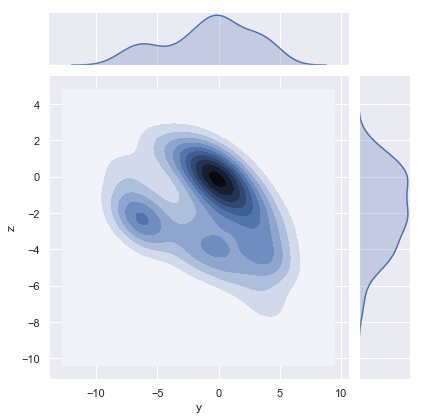

In [604]:
plot_ajast(10,8)

from statistics import mean, median, mode, stdev
import seaborn as sns
import pandas as pd

# take(mv_i)

def stat(X, i):
    
    print('max',max(X[:, i]))
    print('min',min(X[:, i]))
    print('mean',mean(X[:, i]))
    print('median',median(X[:, i]))
    print('std-dev',stdev(X[:, i]))

    
    
# X = models[0].get_embedding().real
# X.shape

X = embeddings

df = pd.DataFrame(data=X[:,:3], columns = ['x' , 'y', 'z'], dtype='float32')
sns.set(color_codes=True)

# stat(X, 0)
# sns.distplot(X[:, 2], rug=True)
sns.jointplot(x="y", y="z", data=df, kind="kde");
# sns.jointplot(x="x", y="y", data=df, kind="hex");

# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=20, shade=True);

In [140]:
!pip install seaborn

     |████████████████████████████████| 215kB 1.7MB/s eta 0:00:01


,0,1,2
0,-0.023990,0.177340,0.284822
1,-0.054209,0.099435,0.153385
2,-0.008926,0.141990,0.219912
3,-0.015167,0.148947,0.244425
4,-0.014028,0.121861,0.202271


In [356]:
X.shape


(126, 3)

In [316]:
X[:, 0][0]

0.0010199430842248026

In [354]:
X[:, 1][0]

0.6891805

In [355]:
X[0]

array([0.       , 0.6891805, 0.       ], dtype=float32)

In [363]:
!pip install node2vec

In [686]:
from node2vec import Node2Vec
import networkx as nx

KG = nx.Graph()

edge_list = []
with open("data_gem/mt.edgelist","r") as f:
    for line in f:
        s = line.split('  ')
        e = (s[0], s[1])
        KG.add_edge(*e)
        
        
# d = get_annot_from_ind(range(126))
# with open("data_gem/mt.edgelist","r") as f:
#     for line in f:
#         s = line.split(' ')
#         edge_list.append((d[int(s[0])], d[int(s[1])]))
        

IndexError: list index out of range

In [559]:
edge_list[:5]

[]

In [586]:
from node2vec import Node2Vec
n2v_obj = Node2Vec(KG, dimensions=3, walk_length=10, num_walks=200, workers=1)

n2v_model = n2v_obj.fit(window=10, min_count=1, batch_words=4)
from sklearn.manifold import TSNE
nodes = [str(i) for i in range(126)]
embeddings = [list(n2v_model.wv.get_vector(n)) for n in nodes]
embeddings = np.array(embeddings)
# tsne_obj = TSNE(n_components=3)
# embeddings = tsne_obj.fit_transform(embeddings)




Computing transition probabilities:   0%|          | 0/126 [00:00<?, ?it/s]


Computing transition probabilities: 100%|██████████| 126/126 [00:00<00:00, 5083.27it/s]


Generating walks (CPU: 1):   0%|          | 0/200 [00:00<?, ?it/s]


Generating walks (CPU: 1):   2%|▏         | 3/200 [00:00<00:11, 16.77it/s]


Generating walks (CPU: 1):   2%|▎         | 5/200 [00:00<00:13, 14.96it/s]


Generating walks (CPU: 1):   3%|▎         | 6/200 [00:00<00:14, 12.99it/s]


Generating walks (CPU: 1):   4%|▍         | 8/200 [00:00<00:15, 12.79it/s]


Generating walks (CPU: 1):   5%|▌         | 10/200 [00:00<00:15, 12.36it/s]


Generating walks (CPU: 1):   6%|▌         | 12/200 [00:00<00:15, 12.16it/s]


Generating walks (CPU: 1):   7%|▋         | 14/200 [00:01<00:15, 12.20it/s]


Generating walks (CPU: 1):   8%|▊         | 16/200 [00:01<00:15, 12.13it/s]


Generating walks (CPU: 1):   9%|▉         | 18/200 [00:01<00:15, 11.67it/s]


Generating walks (CPU: 1):  10%|█         | 20/200 [00:01<00:1

In [530]:
a = n2v_model.wv.most_similar('89')
get_annot_from_ind([78, 77, ])

/Users/user/miniconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



['e6_77', 'mv3_78']

In [598]:
show_3d_scatter(emb=embeddings, name=name)

/Users/user/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



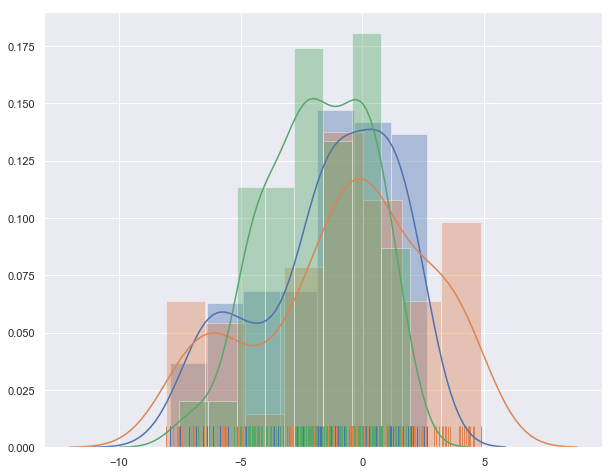

In [628]:
sns.distplot(embeddings[:, 0], rug=True)
sns.distplot(embeddings[:, 1], rug=True) 
sns.distplot(embeddings[:, 2], rug=True)

In [588]:
affinity_propagation(X=embeddings)

8


/Users/user/miniconda3/lib/python3.6/site-packages/plotly/offline/offline.py:526: UserWarning:

Your filename `2d-scatter_SDNE` didn't end with .html. Adding .html to the end of your file.

/Users/user/miniconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning:

invalid value encountered in sqrt



0.45081532